In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
#print(dataset)
print(X)
print(X.shape)

print(y)
print(y.shape)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
(10000, 10)
[1 0 1 ... 1 1 0]
(10000,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

print(X)
print(X.shape)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
(10000, 10)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:]

print(X)
print(X.shape)

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]
(10000, 11)


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8000, 11) (2000, 11) (8000,) (2000,)


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train.shape)
print(X_train)

(8000, 11)
[[-0.5698444   1.74309049  0.16958176 ...  0.64259497 -1.03227043
   1.10643166]
 [ 1.75486502 -0.57369368 -2.30455945 ...  0.64259497  0.9687384
  -0.74866447]
 [-0.5698444  -0.57369368 -1.19119591 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [-0.5698444  -0.57369368  0.9015152  ...  0.64259497 -1.03227043
   1.41231994]
 [-0.5698444   1.74309049 -0.62420521 ...  0.64259497  0.9687384
   0.84432121]
 [ 1.75486502 -0.57369368 -0.28401079 ...  0.64259497 -1.03227043
   0.32472465]]


Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 0.6207 - accuracy: 0.6759
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.8005
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4471 - accuracy: 0.8080
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8104
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.8167
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8250
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3943 - accuracy: 0.8336
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8404
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8447
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3697 - accura

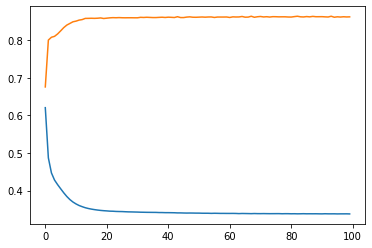

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim = 11))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
r = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['accuracy'], label='accuracy')

In [ ]:
print(ann.predict(sc.transform([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [ ]:
y_pred = ann.predict(X_test)
print(y_pred)

[[0.26365155]
 [0.2964955 ]
 [0.17009845]
 ...
 [0.15535104]
 [0.17817569]
 [0.14324638]]


In [ ]:
y_pred = (y_pred > 0.5)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[1533   62]
 [ 210  195]]


0.864

### Evaluating the ANN (Cross-Validation)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


In [ ]:
ann_cv = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = ann_cv, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()
print(accuracies)
print('Mean = ', mean, '; Variance = ', variance)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


[0.85750002 0.85874999 0.8775     0.86000001 0.87374997 0.83999997
 0.85624999 0.85250002 0.83875    0.86750001]
Mean =  0.8582499980926513 ; Variance =  0.01204418837676624
